# Load documento

In [2]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path='/home/dev/tesi/documenti/DomandeRisposteNew.csv', csv_args={
    'delimiter': ';',
    'quotechar': '"',
    'fieldnames': ['DOMANDE', 'RISPOSTE']
})

docs = loader.load()

In [ ]:
docs

In [ ]:
# Assumiamo che 'docs' sia una lista di oggetti 'Document'
for doc in docs:
    print(doc.page_content)


## Caricamento embedding da testare

In [5]:
from transformers import AutoTokenizer

try:
    tokenizer = AutoTokenizer.from_pretrained("nomic-ai/nomic-embed-text-v1.5")
    print("Tokenizer caricato con successo.")
except Exception as e:
    print(f"Errore nel caricamento del tokenizer: {e}")


/home/dev/tesi/rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tokenizer caricato con successo.


### Carico il grafico per osservare la distribuzione iniziale

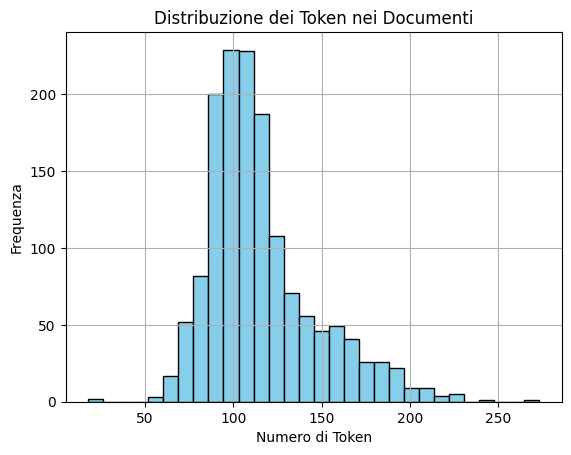

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer

def plot_docs_tokens(docs):
    # Verifica che i dati siano corretti
    if not docs:
        print("La lista dei documenti è vuota.")
        return
    
    # Carica il tokenizer
    tokenizer = AutoTokenizer.from_pretrained("nomic-ai/nomic-embed-text-v1.5")
    
    # Estrai i contenuti e calcola la lunghezza dei token
    lengths = [len(tokenizer.encode(doc.page_content)) for doc in docs]
    
    if not lengths:
        print("Nessuna lunghezza dei token calcolata.")
        return

    # Crea un DataFrame con i dati
    df = pd.DataFrame(lengths, columns=['Token Count'])
    
    # Crea l'istogramma
    ax = df['Token Count'].hist(bins=30, color='skyblue', edgecolor='black')
    
    # Aggiungi etichette e titolo
    plt.xlabel('Numero di Token')
    plt.ylabel('Frequenza')
    plt.title('Distribuzione dei Token nei Documenti')
    plt.grid(True)
    # Mostra il grafico
    plt.show()


plot_docs_tokens(docs)


### Analisi del Grafico

Il grafico mostra una distribuzione più leggibile e presenta le seguenti caratteristiche:

1. **Picco Centrale**: La maggior parte dei documenti ha un numero di token compreso tra 75 e 125, con un picco attorno ai 100 token. Questo indica che la maggior parte dei documenti sono di lunghezza media.
2. **Code**: Ci sono alcuni documenti molto brevi (meno di 50 token) e alcuni molto lunghi (oltre 200 token), ma sono meno frequenti.
3. **Distribuzione Asimmetrica**: La distribuzione è leggermente asimmetrica, con una coda più lunga a destra, indicando che ci sono alcuni documenti significativamente più lunghi rispetto alla maggior parte.


### Effettuo il RecursiveCharacterTextSplitter settando la dimensione del chunk a mio piacimento

In [7]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter

chunk_size = 150

text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    AutoTokenizer.from_pretrained('nomic-ai/nomic-embed-text-v1.5'),
    chunk_size = chunk_size,
    chunk_overlap = int(chunk_size / 10)
)
chunks = text_splitter.split_documents(docs)

In [8]:
len(chunks)

1901

visualizzo il nuovo grafico per poter osservare come si ridistribuiscono i token

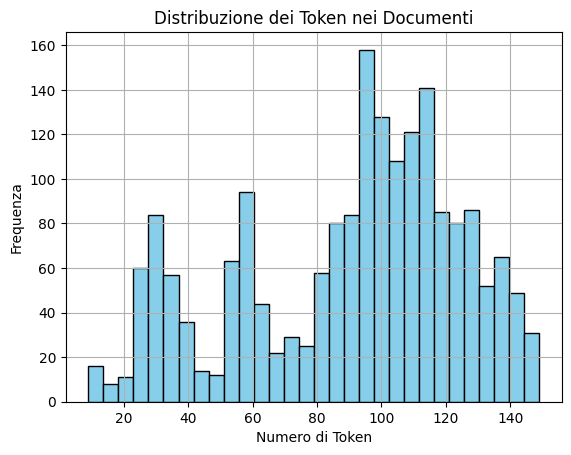

In [10]:
def plot_docs_tokens(chunks):
    # Verifica che i dati siano corretti
    if not chunks:
        print("La lista dei documenti è vuota.")
        return
    
    # Carica il tokenizer
    tokenizer = AutoTokenizer.from_pretrained("nomic-ai/nomic-embed-text-v1.5")
    
    # Estrai i contenuti e calcola la lunghezza dei token
    lengths = [len(tokenizer.encode(doc.page_content)) for doc in chunks]
    
    if not lengths:
        print("Nessuna lunghezza dei token calcolata.")
        return

    # Crea un DataFrame con i dati
    df = pd.DataFrame(lengths, columns=['Token Count'])
    
   # Crea l'istogramma
    ax = df['Token Count'].hist(bins=30, color='skyblue', edgecolor='black')
    
    # Aggiungi etichette e titolo
    plt.xlabel('Numero di Token')
    plt.ylabel('Frequenza')
    plt.title('Distribuzione dei Token nei Documenti')
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()

# Esegui il test
plot_docs_tokens(chunks)